# <p style="background-color:#FF5733; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> Tweet Sentiment Analysis</p>

<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:100%; text-align:left">

<h3 align="left"><font color='#4E5672'>📝 Description:</font></h3>

The aim of the project is to create awareness that there are tens of thousands of people who express their grief, pain and loneliness on social media platforms where users share their happiness, shouts, music they listen to, movies they watch. After retrieving Turkish Tweets from the year 2022 using Twitter APls, content that is not related to the emotions of the users such as political figures, public institutions and organizations, breaking news, etc. were excluded from the dataset and only the emotions of the individuals and the tweets that respond to the question "What's happening?" asked by Twitter before tweeting. The tweets were manually labeled based on the emotion they conveyed, not on the lexical breakdown. In this project, Logistic Regression was used to develop a bot that can perform sentiment analysis on live tweets and immediately afterwards, according to the model prediction, communicate with the owners of the negatively tagged tweets via Twitter mentions and suggest playlists that can provide instant morale and motivation to the users.
    
<center><img width=300px src="https://www.1min30.com/wp-content/uploads/2017/09/nouveau-logo-twitter.jpg"></center>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#1DA1F2; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #1DA1F2">Dataset</p>

'tweets_labeled.csv' contains tweets from Twitter 2022, the dates of the tweets and the sentiment of the tweets, labeled with -1, 0 and 1. 'tweets_21.csv' contains tweets from 2021.

**tweets_labeled.csv**
4 Variable
12,690 Observation
506.4 KB

tweet_id: Tweet's id information
tweet: Tweet content
date: Date and time of the tweet
label: Manually entered hashtag information based on the sentiment of the tweet
        -1: negative
        1: positive
        0: neutral

**tweets_21.csv:** 
3 Variable
13,272 Observation
311.2 KB

tweet_id: The id of the tweet
Tweet: Tweet content
tweet date: The date and time of the tweet

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#1DA1F2; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #1DA1F2">Feature Engineering</p>

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

In [15]:
# Load the dataset
df = pd.read_csv("/kaggle/input/nlp-tweets/tweets_labeled.csv")


In [16]:
# Check for missing values
print(df.isnull().sum())
df= df.dropna()

tweet_id    0
tweet       1
date        0
label       0
dtype: int64


In [17]:
# Convert 'date' to datetime format
df["date"] = pd.to_datetime(df["date"])

In [18]:
# Set 'date' to GMT+03:00 timezone
df["date"] = df["date"].dt.tz_convert("Europe/Istanbul")

In [19]:
# Create new variables from 'date'
df["season"] = df["date"].dt.quarter
df["day"] = df["date"].dt.day_name()
df["period"] = df["date"].dt.hour // 6

In [20]:
# Rename 'label' values
df["label"] = df["label"].replace([-1, 0, 1], [-1, 0, 1])

In [21]:
# Extract numeric and categorical columns
numeric_cols = list(df.select_dtypes(include=np.number).columns)
categorical_cols = list(df.select_dtypes(exclude=np.number).columns)

In [22]:
# Remove the emojis out of the text
import emoji
import re

import re

df['tweet'] = df['tweet'].fillna('')

def remove_emojis(text):
    if pd.isnull(text):
        return ''

    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [23]:
df['tweet'] = df['tweet'].apply(remove_emojis)

In [24]:
# Function to analyze target variable for a given column
def summary(dataframe, col_name, plot=False):
    # Analyze target variable for negative tweets
    dataframe = dataframe.loc[dataframe["label"] == -1]
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("---------------------------------------------")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

                                                    tweet     Ratio
tweet                                                              
Burası dünya hayaller hevesler umutlar hep yarı...      2  0.068871
Ruhumun bedenimden ayrılıp gitmesi gerekiyor öl...      1  0.034435
Kalbimin üzerinde yine bi ağrı heyecanla bekliy...      1  0.034435
Eğer hayattan keyif alamıyorsanız ve yeni bir h...      1  0.034435
Herşeyi heyecanla anlattığım bir duvarı , evim ...      1  0.034435
...                                                   ...       ...
“Ben insanların kalbini kırmaktan korkunca,insa...      1  0.034435
Ay bu koreliler ne yapmis cok korkunc uzuldum a...      1  0.034435
'Al beni korkarak uyandığım tüm kabuslardan!'           1  0.034435
Sırf birisini kaybetmek istemediğin için daha f...      1  0.034435
Hafta içi her gün aaat 15.00'ten sonra boynuma ...      1  0.034435

[2903 rows x 2 columns]
---------------------------------------------


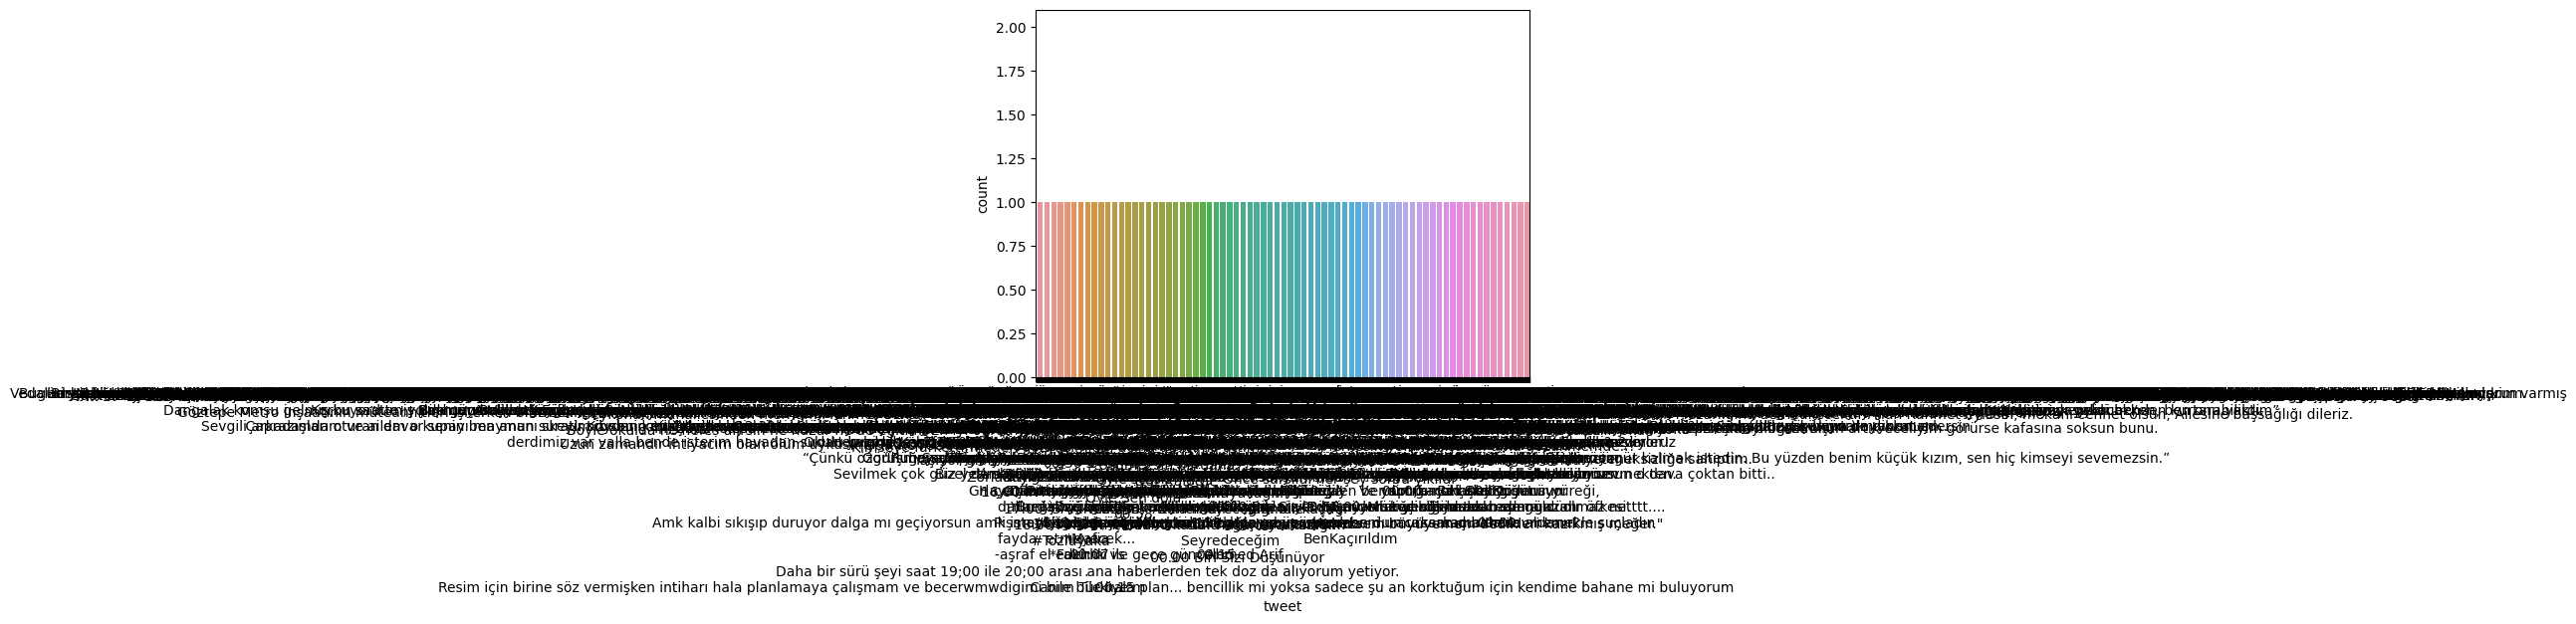

                           date     Ratio
date                                     
2022-10-30 00:00:16+03:00     2  0.068871
2022-01-02 13:11:00+03:00     2  0.068871
2022-07-25 09:45:27+03:00     1  0.034435
2022-09-18 01:32:49+03:00     1  0.034435
2022-09-13 13:16:22+03:00     1  0.034435
...                         ...       ...
2022-10-29 23:07:43+03:00     1  0.034435
2022-10-29 02:26:40+03:00     1  0.034435
2022-10-27 13:25:42+03:00     1  0.034435
2022-10-26 09:44:26+03:00     1  0.034435
2022-03-15 18:09:09+03:00     1  0.034435

[2902 rows x 2 columns]
---------------------------------------------


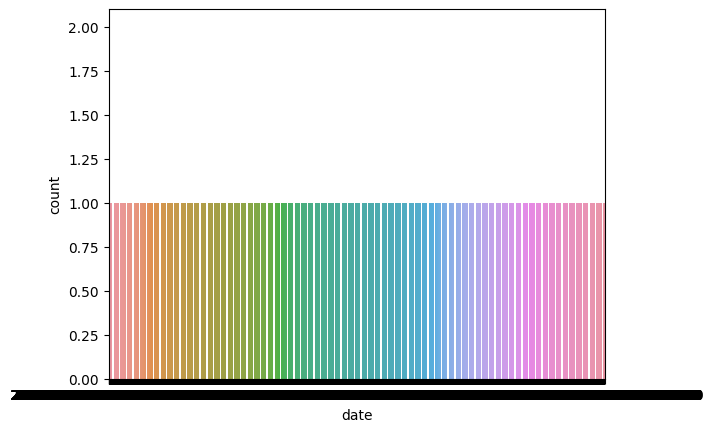

           day      Ratio
day                      
Tuesday    451  15.530303
Monday     435  14.979339
Friday     433  14.910468
Sunday     417  14.359504
Thursday   408  14.049587
Wednesday  388  13.360882
Saturday   372  12.809917
---------------------------------------------


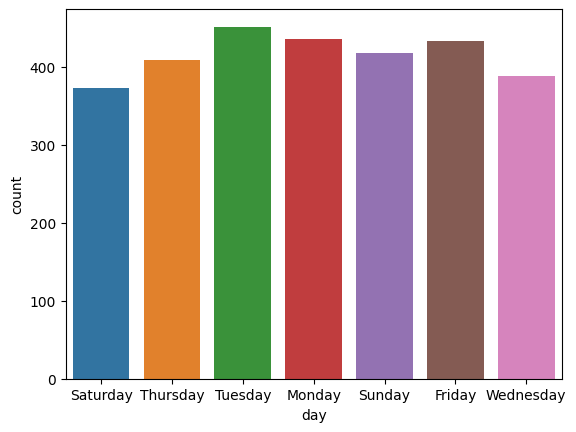

In [25]:
# Iterate through categorical columns and analyze target variable
for col in categorical_cols:
    summary(df, col, plot=True)

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#1DA1F2; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #1DA1F2">Preparing the Data and Logistic Regression</p>

In [26]:
# Import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
def label_encoder(df):
    label_encoder = LabelEncoder()
    df["label"] = label_encoder.fit_transform(df["label"])
    return df

In [28]:
def train_model(df, tfidf):
    X = tfidf.fit_transform(df["tweet"])
    y = df["label"]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model with an increased max_iter value
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    return model

In [29]:
def evaluate_model(model, df, tfidf):
    # Transform the tweets into TF-IDF vectors
    X = tfidf.transform(df["tweet"])

    # Predict the labels for the test data
    y_pred = model.predict(X)

    print("Debug Information:")
    print("y_pred shape:", y_pred.shape)
    print("df['label'] shape:", df['label'].shape)
    print("y_pred values:", y_pred)
    print("df['label'] values:", df['label'].values)

    # Calculate the accuracy
    accuracy = accuracy_score(y_pred, df["label"])
    return accuracy

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#1DA1F2; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #1DA1F2">Modeling</p>

In [30]:
def main():
    print("Start of main function")
    df_21 = pd.read_csv(r"/kaggle/input/nlp-tweets/tweets_21.csv")
    df_labeled = pd.read_csv(r"/kaggle/input/nlp-tweets/tweets_labeled.csv")
    print("CSV files read successfully")

    # Handle missing values by replacing NaN with an empty string
    df_labeled['tweet'] = df_labeled['tweet'].fillna('')

    df_labeled = label_encoder(df_labeled.copy())

    # Create a TF-IDF matrix
    tfidf = TfidfVectorizer()
    df_labeled_tfidf = tfidf.fit_transform(df_labeled["tweet"])

    # Train the model
    model = train_model(df_labeled, tfidf)

    # Evaluate the model
    accuracy = evaluate_model(model, df_labeled, tfidf)
    print(f"Accuracy: {accuracy}")

    # Display the plot (if needed)
    plt.show(block=True)


In [31]:
if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"An error occurred: {e}")
        

Start of main function
CSV files read successfully
Debug Information:
y_pred shape: (12960,)
df['label'] shape: (12960,)
y_pred values: [2 1 1 ... 1 1 2]
df['label'] values: [2 2 2 ... 1 1 1]
Accuracy: 0.7938271604938272


<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'> ❗ Note </font></h3>
    
* The **if __name__ == "__main__"**: statement is a special construct in Python used to execute code only when the script is run directly, not when it is imported as a module. This is a common practice in Python programming to organize code and separate the main program logic from code that may be reused in other modules.
    
    In this case, the main() function is the main program logic that performs the sentiment analysis task. When the script is run directly, the **if __name__ == "__main__"**: statement ensures that the main() function is executed. If the script is imported as a module, the main() function is not executed.
    
    This approach is helpful for separating the main program logic from reusable code and for preventing the main program logic from being accidentally executed when the script is imported as a module.

<div style="border-radius:10px; border:#FC7D44 solid; padding: 15px; background-color: #F9C5AE; font-size:100%; text-align:left">

<h3 align="left"><font color='#000000'> Conclusion </font></h3>
    
* The code execution starts with the main() function. It successfully reads CSV files and proceeds with debugging information:
    
*     The predicted labels (y_pred) have a shape of (12960,).
*     The actual labels (df['label']) have a shape of (12960,).
*     Sample values of y_pred are [2, 1, 1, ..., 1, 1, 2].
*     Sample values of df['label'] are [2, 2, 2, ..., 1, 1, 1].
    
Finally, the accuracy of the model is calculated, resulting in an **accuracy score of approximately 79.38%**. This score indicates the proportion of correctly predicted labels in the dataset, suggesting that the model performs well in classifying sentiment based on the provided features.